In [132]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [133]:
def trimmed_mean(X,alpha):
      # bar{X_\alpha} = frac{1}{n - 2k}$ $\sum_{i=k+1}^{n-k}$ $X_{(i)}$
        n = len(X)
        k = int(n*alpha)
        X = np.sort(X)
        X_sum = np.sum(X[k:n-k])
        return (1/(n-2*k))*X_sum
    

In [134]:
def simulate(B,n, mu = 2, sigma =4, alpha = 0):
    np.random.seed(123)
    matrix = np.random.normal(loc=mu, scale=sigma, size=(n, B))
    if alpha == 0:
        mean = np.mean(matrix, axis=0)
        return mean
    else:
       mean = np.array([trimmed_mean(matrix[:, b], alpha) for b in range(B)])
    return mean

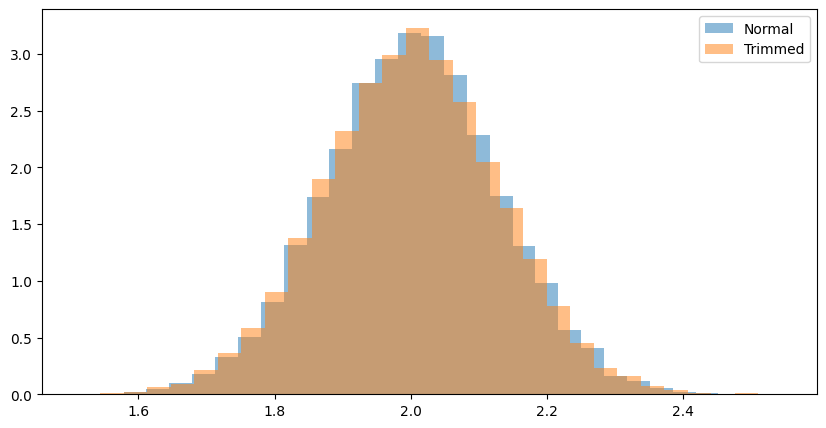

In [135]:
sim = simulate(10000, 1000)
sim_trimmed = simulate(10000, 1000, alpha=0.05)
plt.figure(figsize=(10,5))
plt.hist(sim, bins=30, density=True,alpha=0.5, label='Normal')
plt.hist(sim_trimmed, bins=30, density=True , alpha=0.5, label='Trimmed')
plt.legend()


In [136]:
#from simulation 
ARE = np.var(sim_trimmed)/np.var(sim)
print("Asymptotic Relative Efficiency (ARE):", ARE)

Asymptotic Relative Efficiency (ARE): 1.0214668013621404


In [ ]:
def relative_efficiency(alpha):
    if not (0 < alpha < 0.5):
        raise ValueError("alpha deve essere compreso tra 0 e 0.5")

    Z_alpha = norm.ppf(alpha)  # Quantile della normale standard
    Z_1_minus_alpha = norm.ppf(1 - alpha)

    phi_Z_alpha = norm.pdf(Z_alpha)  # Densità della normale standard
    Phi_Z_alpha = norm.cdf(Z_alpha)
    Phi_Z_1_minus_alpha = norm.cdf(Z_1_minus_alpha)

    ARE = 1/(1 - 2 * alpha) + (2 * Z_alpha * (phi_Z_alpha ))/ (1 - 2 * alpha)**2
    
    return ARE
print("Asymptotic Relative Efficiency (ARE):" ,relative_efficiency(0.05))


Asymptotic Relative Efficiency (ARE): 1.4445868889599496
